In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X, y = mnist.data, mnist.target

In [2]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

In [3]:
X.shape, y.shape

((70000, 784), (70000,))

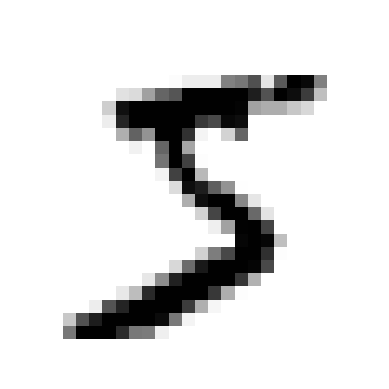

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    plt.show()

plot_digit(X[0])

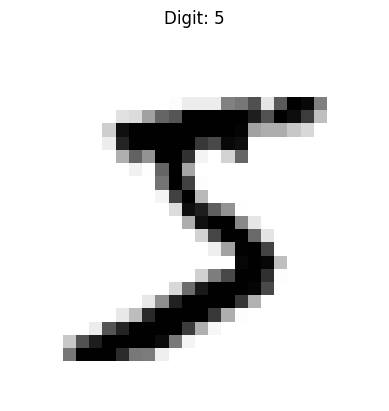

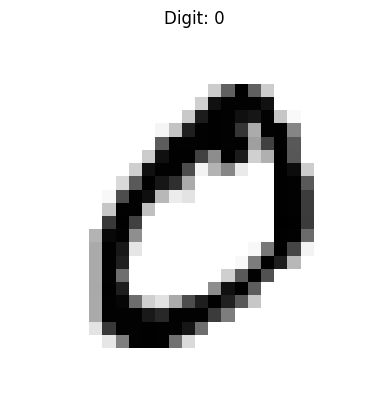

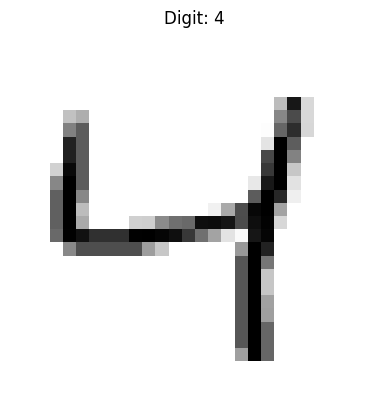

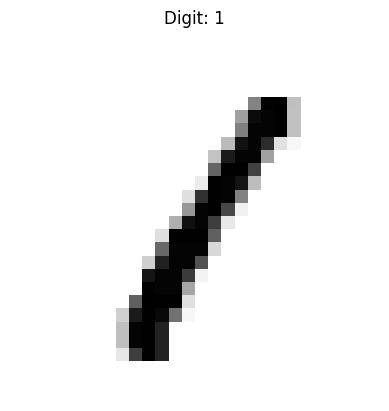

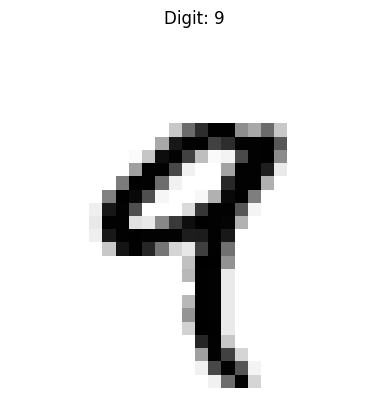

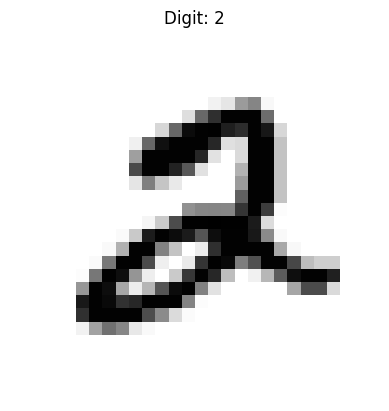

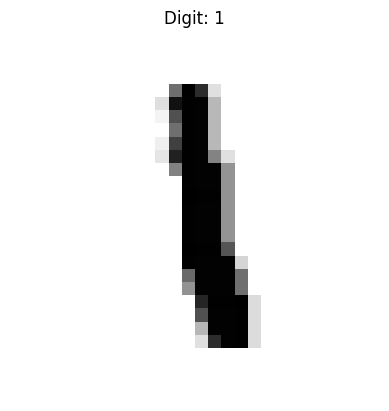

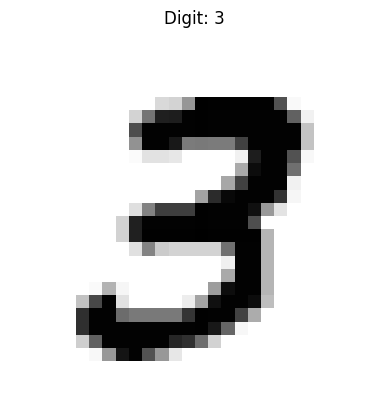

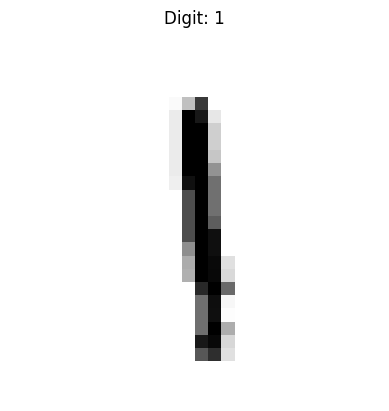

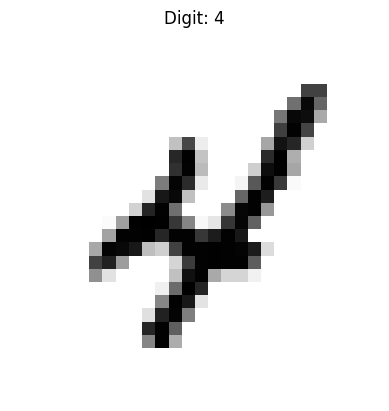

In [32]:
# Plot First 10 digits

for i in range(10):
    plt.title(f"Digit: {y[i]}")
    plot_digit(X[i])
    
plt.show()

Text(0, 0.5, 'Count')

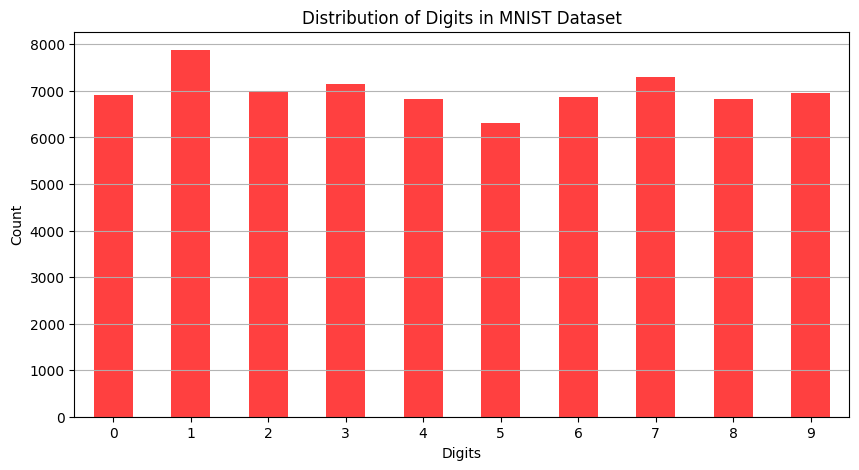

In [22]:
# checking the imbalance of the labels

pd.Series(y).value_counts().sort_index().plot(kind="bar", figsize=(10, 5), color="red", alpha=.75, zorder = 1) 
plt.title("Distribution of Digits in MNIST Dataset")
plt.xticks(np.arange(10), np.arange(10))
plt.grid(axis="y", alpha=0.95, zorder = 2)
plt.xticks(rotation=0)
plt.xlabel("Digits")
plt.ylabel("Count")

As we can see that labels in the mnist dataset is imbalanced so we have use Stratified Shuffle for perserving the imbalance

In [23]:
# Split the dataset into training and test sets using train_test_split with stratification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42, stratify=y)

In [24]:
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Training set size: 60000
Test set size: 10000
Shape of X_train: (60000, 784)
Shape of y_train: (60000,)
Shape of X_test: (10000, 784)
Shape of y_test: (10000,)


In [27]:
some_digit = X_train[0]

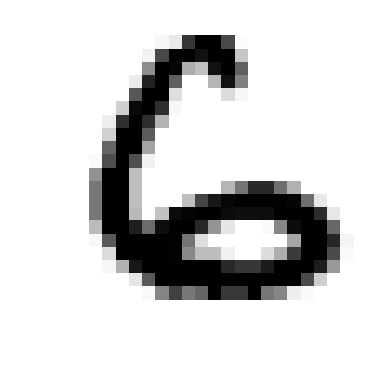

'6'

In [28]:
plot_digit(some_digit)
y_train[0]

In [37]:
# Using the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import sklearn
sklearn.set_config(display="diagram")

knn_clf = KNeighborsClassifier()

param_grid = {
    "n_neighbors": [3, 5, 7, 9, 10, 11],
    "weights": ["uniform", "distance"],
}

grid_search = GridSearchCV(knn_clf, param_grid, cv=StratifiedKFold(n_splits=5), verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[CV] END .....................n_neighbors=3, weights=uniform; total time=  48.1s
[CV] END .....................n_neighbors=3, weights=uniform; total time=  48.2s
[CV] END .....................n_neighbors=3, weights=uniform; total time=  49.5s
[CV] END .....................n_neighbors=3, weights=uniform; total time=  49.7s


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGTERM(-15)}
Detailed tracebacks of the workers should have been printed to stderr in the executor process if faulthandler was not disabled.